# <font color='blue'>Feynn Labs Service</font>

## <font color='black'>Breast Cancer Prediction using ML</font>

## <font color='blue'>Bage Aman Shaikh(Intern)</font>

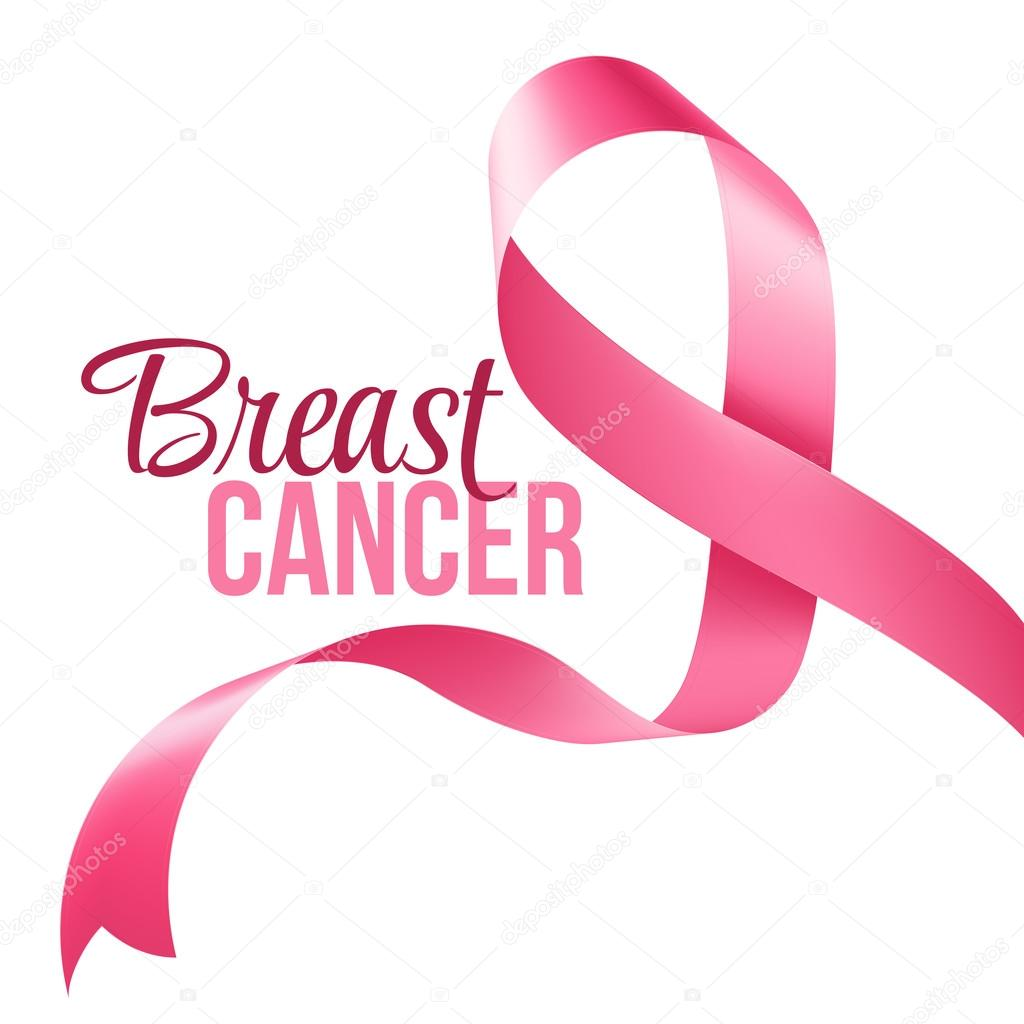

The Breast Cancer datasets is available UCI machine learning repository.
The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

1= Malignant (Cancerous) - Present (M)<br>
0= Benign (Not Cancerous) -Absent (B)

In [6]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

In [7]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [10]:
# Loading the data
dataframe = pd.read_csv('data.csv')

In [11]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The last column named "Unaname: 32" seems like an erronous coloumn in our dataset. We might probably just drop it.<br>
Most of the columns seem to have a numeric entry. This would save our time from mapping the variables.<br>
The ID column would not help us contributing to predict about the cancer. We might as well drop it.

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Only the 'diagnosis' column, which we have to predict is of object datatype.<br>
There's only ID column of int type. We will probably drop it anyway.<br>
There are a total of 31 columns which are of float datatype.

In [13]:
dataframe.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
dataframe.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
dataframe.diagnosis.replace({"M":1,"B":0},inplace=True)
dataframe.diagnosis.unique()

array([1, 0], dtype=int64)

In order to conduct our analysis easily, we have converted the target column as:<br>
Malignant - 1<br>
Benignant - 0

Text(0.5, 1.0, 'Correlation Map')

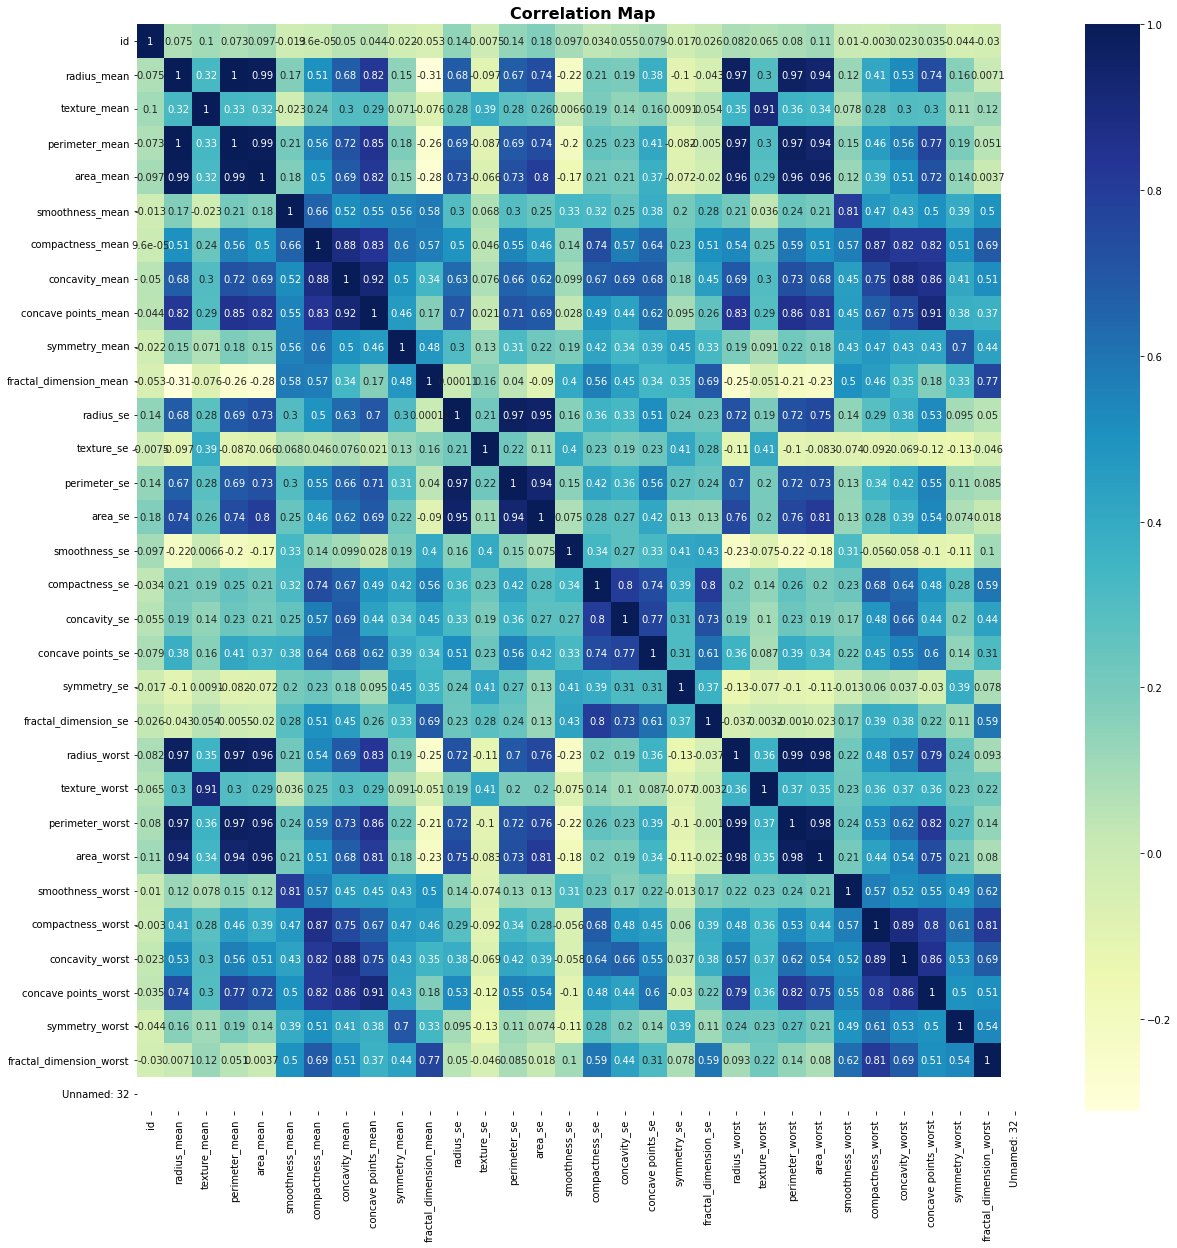

In [15]:
corr = dataframe.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [16]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

The following columns are the one's that show the greatest correlation with our diagnosis column. There are two things that can be done.<br>
1)We can either use only the columns which have greatest correlation, or we can continue to use all the columns.<br>
2)I will be using all these columns to predict our result

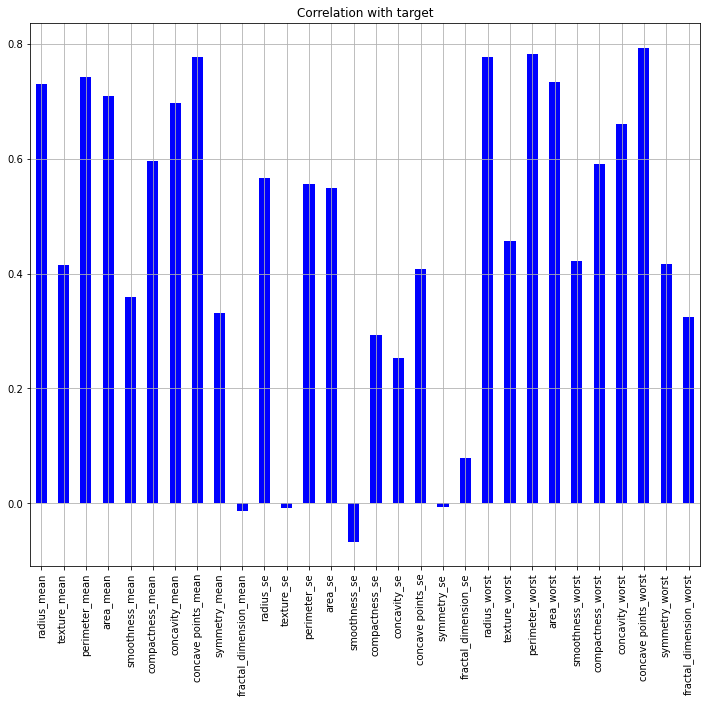

In [17]:
dataframe.drop('diagnosis', axis=1).corrwith(dataframe.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="blue");

Around half of our columns are more than 50% positively correlated to diagnosis column.<br>
<b>We have to select which of the attributes we want to use in building our model!<b>

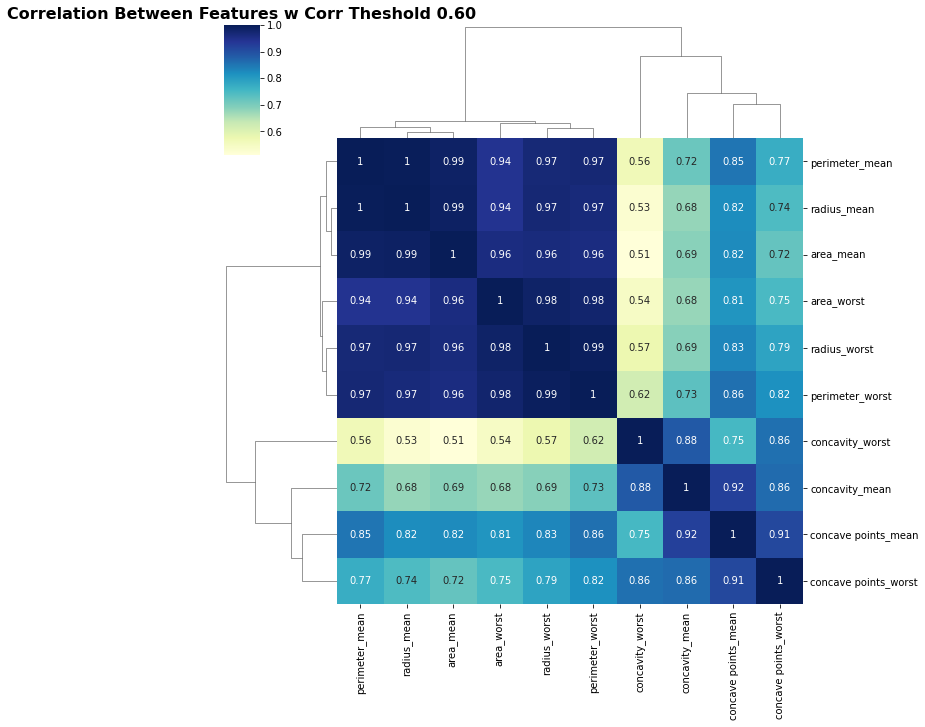

In [19]:
corr_matrix = dataframe.corr()
threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()

<font color='blue'><b>Pair plot</font> 


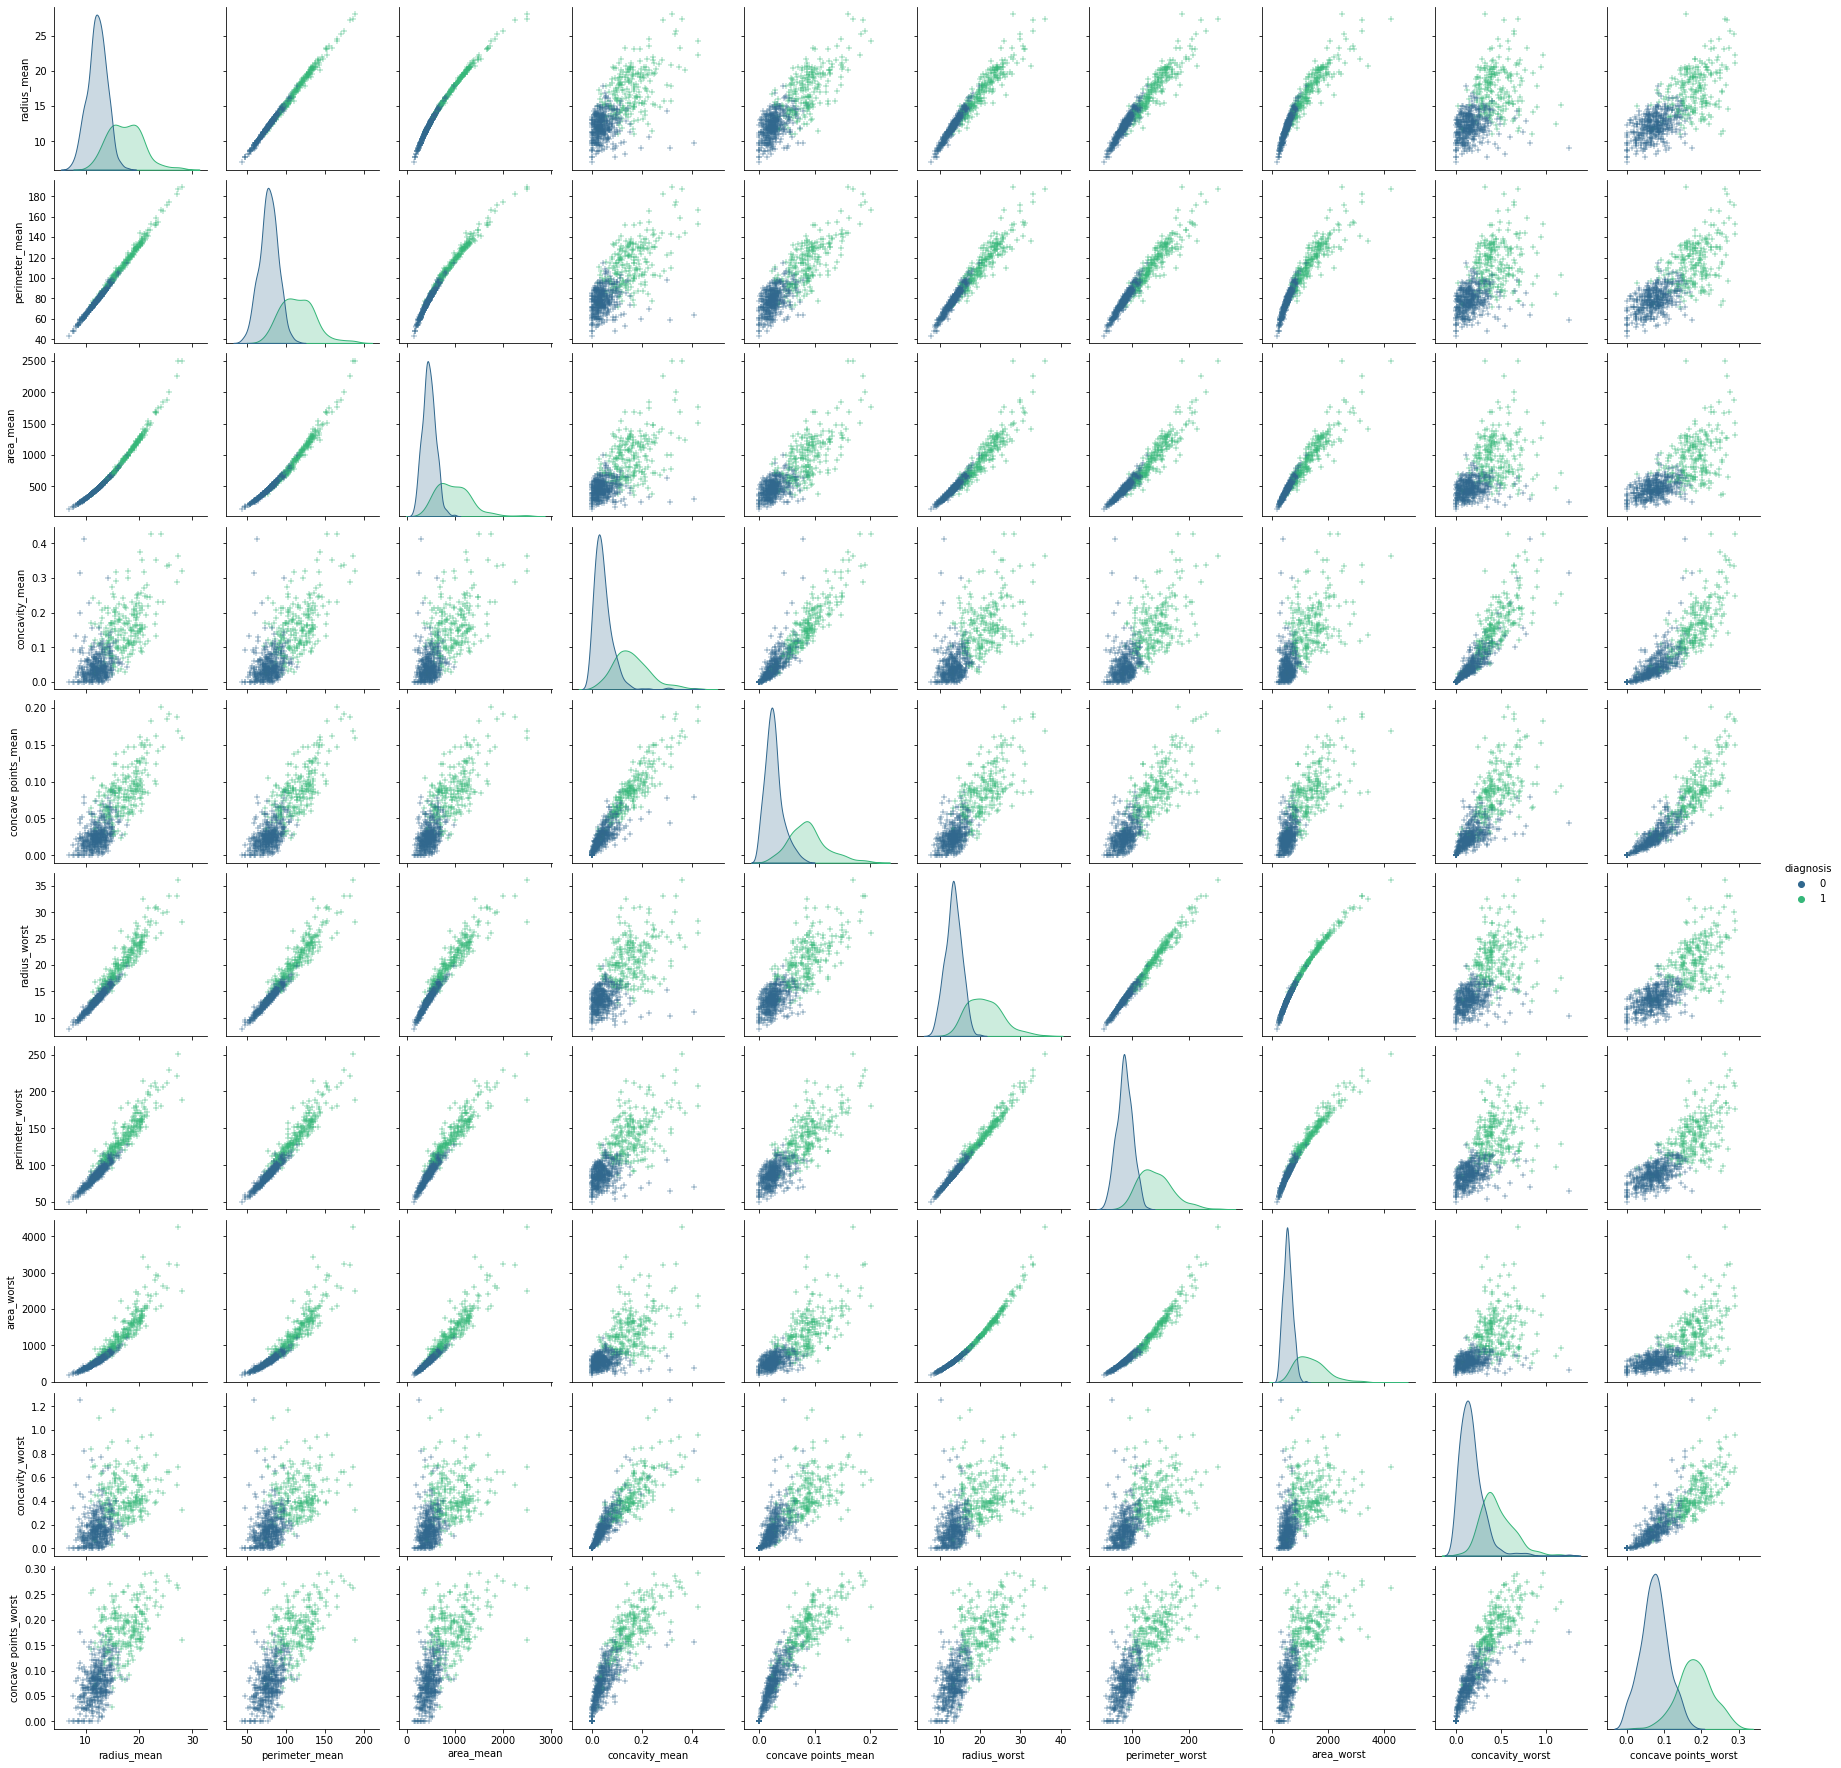

In [23]:
sns.pairplot(dataframe[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()


We would need to eliminate the outliers so that it does not affects our model's accuracy. Let us see if there are any outliers present in the dataset!

<font color='black'><b>About The Local Outlier Factor</font> 

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [25]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=dataframe["diagnosis"]
X=dataframe.drop(["diagnosis"],axis=1)
columns= dataframe.columns.tolist()

In [26]:
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]


array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1])

1 = inlier<br>
-1 = outlier<br>
So there are 3 columns that have outliers, lets plot them and check them out!

In [27]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

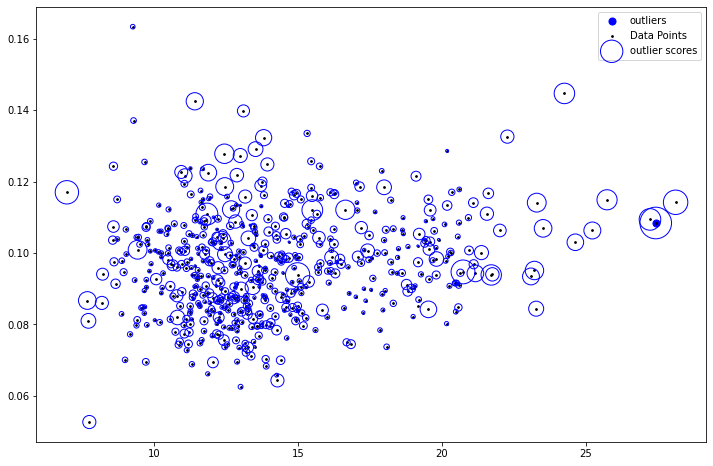

In [29]:
plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,0],X.iloc[:,4],s=1000*radius,edgecolors="b",facecolors="none",label="outlier scores")
plt.legend();

In [30]:
X= X.drop(outlier_index)
y= y.drop(outlier_index).values

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
key = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)}

In [39]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9824561403508771
KNeighborsClassifier 0.9532163742690059
RandomForestClassifier 0.9649122807017544
GradientBoostingClassifier 0.9766081871345029
[21:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9766081871345029


Text(0.5, 1.0, 'Plotting the Model Accuracies')

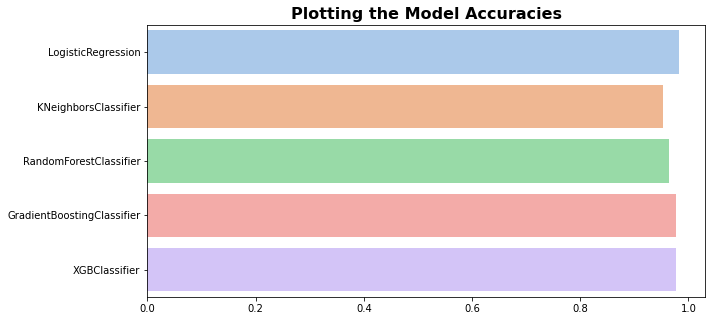

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

We can clearly see that all our models perform with more than 95% accuracy where KNeighborsClassifier has the lowest of 95.32% and LogisticRegression has the highest of 98.25% accuracy.
Let us see if we can further improve the accuracy of our model by adding a few changes to it!

In [43]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.9385964912280702
2 0.9298245614035088
3 0.9473684210526315
4 0.9473684210526315
5 0.9649122807017544
6 0.956140350877193
7 0.9736842105263158
8 0.9385964912280702
9 0.9385964912280702
10 0.9473684210526315
11 0.9298245614035088
12 0.9473684210526315
13 0.9298245614035088
14 0.9649122807017544
15 0.8947368421052632
16 0.9736842105263158
17 0.956140350877193
18 0.9649122807017544
19 0.9473684210526315
20 0.9912280701754386
21 0.956140350877193
22 0.9649122807017544
23 0.9649122807017544
24 0.9298245614035088


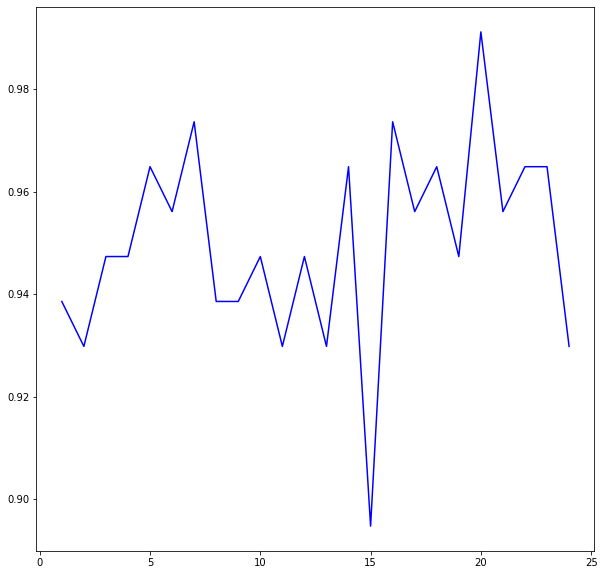

In [45]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='blue')

for i in range(len(rs)):
    print(rs[i],acc[i])

From the above figure we can see that our model touches somewhere around 99% between (20-25). Let's try to see where exactly does this happen!

In [46]:
for i in range(0,24):
    if acc[i] > 0.98:
        print(acc[i])

0.9912280701754386


From the above plot we may conclude that highest accuracy is achieved at 20th iteration.

<font color='blue'><b>We have finally built a model with an accuracy of 99.12%!</font> 

<font color='blue'><b>Summary: </font> We used a total of 5 models in order to achieve our final result.

* LogisticRegression <b>99.12 %

* KNeighborsClassifier <b>95.32 %

* RandomForestClassifier <b>96.50 %

* GradientBoostingClassifier <b>97.67 %

* XGBClassifier <b>97.67 %

<font color='blue'><b>Thank you!</font>